# Online Retail Sales Exploratory Data Analysis

## Understand Basic Dataset Contents
**[Data Quality Issues/Concerns](#data_quality_issues_concerns)**

**Items**
- What Items are Ordered the Most/Least?
- What Items bring in the most/least Revenue?

**Cancelled Orders**
- Fully Cancelled Order Analysis
- Partially Cancelled Order Analysis

**Customers**
- What Customers Order the Most/Least?
- What Customers Spend the Most (total and per order)?

**Countries**
- What Countries Order the Most/Least?
- What Countries Spend the Most (total and per order)?

**Regions/Sub-Regions**
- What Regions/Sub-Regions Order the Most/Least?
- What Regions/Sub-Regions Spend the Most (total and per order)?

**Invoice Dates**
- Day/Hour Analysis
- Timeseries Analysis

### Setup Libraries and Load in Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
country_mapping_df = pd.read_csv("data/Country Mapping.csv")
region_mapping_df = pd.read_csv("data/region_mapping.csv")
retail_sales_df = pd.read_csv("data/Online Retail.csv")
retail_sales_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


### Create New Features and Create Aggregate Tables

In [3]:
# Add new features
retail_sales_df["Cost"] = retail_sales_df["UnitPrice"]*retail_sales_df["Quantity"]
retail_sales_df['alpha-3'] = pd.merge(retail_sales_df,country_mapping_df,how='left',left_on='Country',right_on='country_name').drop(['country_name'],axis=1)['alpha-3']

# Create Aggregate Tables
customer_invoice_totals = retail_sales_df.groupby(["CustomerID","InvoiceNo"])["Cost"].sum().reset_index()

### Data Quality Issues/Concerns
<a id='data_quality_issues_concerns'></a>

**InvoiceNo with Negative Cost**

It looks like there are orders that fully or partially cancel out a previous order. Examples of this are InvoiceNo `581483` which is cancelled out by `C581484` so when running our analysis or building our models we should remove these orders from the analysis. 

When building models this may be something we want to predict liklihood an order is cancelled based on the order information.

In [4]:
retail_sales_df.sort_values("Cost",ascending=False)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cost,alpha-3
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom,168469.60,GBR
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom,77183.60,GBR
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,6/10/2011 15:28,649.50,15098.0,United Kingdom,38970.00,GBR
15017,537632,AMAZONFEE,AMAZON FEE,1,12/7/2010 15:08,13541.33,NaN,United Kingdom,13541.33,GBR
299982,A563185,B,Adjust bad debt,1,8/12/2011 14:50,11062.06,NaN,United Kingdom,11062.06,GBR
...,...,...,...,...,...,...,...,...,...,...
43702,C540117,AMAZONFEE,AMAZON FEE,-1,1/5/2011 9:55,16888.02,NaN,United Kingdom,-16888.02,GBR
524602,C580605,AMAZONFEE,AMAZON FEE,-1,12/5/2011 11:36,17836.46,NaN,United Kingdom,-17836.46,GBR
222681,C556445,M,Manual,-1,6/10/2011 15:31,38970.00,15098.0,United Kingdom,-38970.00,GBR
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom,-77183.60,GBR


**Missing Customer IDs**

There are around 135,000 (~25%) records without a CustomerID which will affect any analysis done at the Customer level

In [5]:
retail_sales_df[retail_sales_df.CustomerID.isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cost,alpha-3
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom,0.00,GBR
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom,2.51,GBR
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom,5.02,GBR
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom,3.40,GBR
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom,3.32,GBR
...,...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom,20.65,GBR
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom,16.52,GBR
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom,4.96,GBR
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom,10.79,GBR


**Fee's and Adjustments in an Invoice**

There are some transactions that have an associated Stock code for a Fee or an adjustment made to the invoice

In [6]:
retail_sales_df.Description.value_counts().reset_index().Description.to_list()

['WHITE HANGING HEART T-LIGHT HOLDER',
 'REGENCY CAKESTAND 3 TIER',
 'JUMBO BAG RED RETROSPOT',
 'PARTY BUNTING',
 'LUNCH BAG RED RETROSPOT',
 'ASSORTED COLOUR BIRD ORNAMENT',
 'SET OF 3 CAKE TINS PANTRY DESIGN ',
 'PACK OF 72 RETROSPOT CAKE CASES',
 'LUNCH BAG  BLACK SKULL.',
 'NATURAL SLATE HEART CHALKBOARD ',
 'POSTAGE',
 'JUMBO BAG PINK POLKADOT',
 'HEART OF WICKER SMALL',
 'JAM MAKING SET WITH JARS',
 'JUMBO STORAGE BAG SUKI',
 "PAPER CHAIN KIT 50'S CHRISTMAS ",
 'JUMBO SHOPPER VINTAGE RED PAISLEY',
 'LUNCH BAG CARS BLUE',
 'LUNCH BAG SPACEBOY DESIGN ',
 'JAM MAKING SET PRINTED',
 'RECIPE BOX PANTRY YELLOW DESIGN',
 'SPOTTY BUNTING',
 'LUNCH BAG SUKI DESIGN ',
 'ROSES REGENCY TEACUP AND SAUCER ',
 'LUNCH BAG PINK POLKADOT',
 'WOODEN PICTURE FRAME WHITE FINISH',
 'SET OF 4 PANTRY JELLY MOULDS',
 'ALARM CLOCK BAKELIKE RED ',
 'GREEN REGENCY TEACUP AND SAUCER',
 'LUNCH BAG APPLE DESIGN',
 'VICTORIAN GLASS HANGING T-LIGHT',
 'RED RETROSPOT CHARLOTTE BAG',
 'LUNCH BAG WOODLAND',
 'RABB

In [7]:
retail_sales_df[(retail_sales_df.Description.fillna("").str.lower().str.contains("postage| fee|adjust|manual"))&(~retail_sales_df.Description.fillna("").str.lower().str.contains("feed"))].Description.unique()

array(['POSTAGE', 'DOTCOM POSTAGE', 'Manual', 'AMAZON FEE',
       'reverse 21/5/10 adjustment', 'Adjustment', 'adjustment', 'adjust',
       'reverse previous adjustment', 'Adjust bad debt',
       'taig adjust no stock', 'temp adjustment', 'taig adjust',
       'OOPS ! adjustment', 'Amazon Adjustment', 're-adjustment',
       'amazon adjust', 'dotcom adjust'], dtype=object)

In [8]:
retail_sales_df[retail_sales_df.Description=="adjustment"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cost,alpha-3
166639,550947,21319,adjustment,3,4/21/2011 15:55,0.0,NaN,United Kingdom,0.0,GBR
169714,551240,51020A,adjustment,41,4/27/2011 11:48,0.0,NaN,United Kingdom,0.0,GBR
170485,551304,48189,adjustment,2,4/27/2011 14:56,0.0,NaN,United Kingdom,0.0,GBR
195520,553719,85017C,adjustment,1,5/18/2011 16:18,0.0,NaN,United Kingdom,0.0,GBR
368142,568946,22740,adjustment,89,9/29/2011 15:01,0.0,NaN,United Kingdom,0.0,GBR
414724,572477,20665,adjustment,-15,10/24/2011 13:39,0.0,NaN,United Kingdom,-0.0,GBR
417107,572614,23595,adjustment,5,10/25/2011 11:38,0.0,NaN,United Kingdom,0.0,GBR
418453,572723,21829,adjustment,12,10/25/2011 15:13,0.0,NaN,United Kingdom,0.0,GBR
418454,572724,84507C,adjustment,4,10/25/2011 15:14,0.0,NaN,United Kingdom,0.0,GBR
418659,572740,22687,adjustment,1,10/25/2011 15:45,0.0,NaN,United Kingdom,0.0,GBR


### Items

### Cancelled Orders

### Customers

In [9]:
customer_invoice_totals.sort_values("Cost")

,CustomerID,InvoiceNo,Cost
15578,16446.0,C581484,-168469.60
1,12346.0,C541433,-77183.60
10933,15098.0,C556445,-38970.00
13225,15749.0,C550456,-22998.40
14228,16029.0,C570556,-11816.64
...,...,...,...
196,12415.0,556917,22775.93
19045,17450.0,567423,31698.16
10931,15098.0,556444,38970.00
0,12346.0,541431,77183.60


In [10]:
# Each Customer could have multiple Invoices
retail_sales_df.groupby("CustomerID")["InvoiceNo"].unique().str.len().sort_values()

CustomerID
15300.0      1
13833.0      1
16123.0      1
13829.0      1
13828.0      1
          ... 
13089.0    118
14606.0    128
17841.0    169
12748.0    224
14911.0    248
Name: InvoiceNo, Length: 4372, dtype: int64

In [11]:
# Each Customer could have multiple countries
retail_sales_df.groupby("CustomerID")["Country"].unique().str.len().sort_values()

CustomerID
12346.0    1
16272.0    1
16274.0    1
16275.0    1
16276.0    1
          ..
12417.0    2
12457.0    2
12455.0    2
12429.0    2
12394.0    2
Name: Country, Length: 4372, dtype: int64

### Countries

In [12]:
# Countries are mostly in Europe with a few in North America, Asia, Africa and the Middle East


In [13]:
# Add Country to region mapping

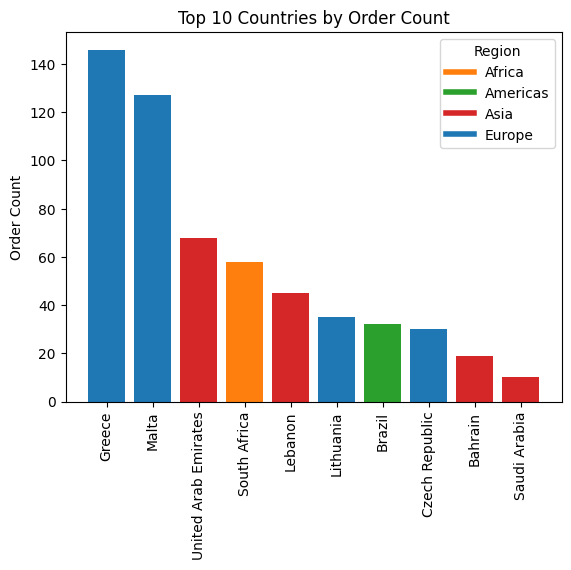

In [14]:
def rotate_text(text):
    return"\n".join([x.upper() for x in text])
def rotate_list(text_list):
    return [rotate_text(x) for x in text_list]
def region_to_color(region):
    if region=="Europe":
        return "tab:blue"
    elif region=="Asia":
        return "tab:red"
    elif region=="Africa":
        return "tab:orange"
    elif region=="Americas":
        return "tab:green"
    else:
        return "tab:grey"
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color="tab:orange", lw=4),
                Line2D([0], [0], color="tab:green", lw=4),
                Line2D([0], [0], color="tab:red", lw=4),
                Line2D([0], [0], color="tab:blue", lw=4)]
region_list = ["Africa","Americas","Asia","Europe"]


country_level_invoice_counts = retail_sales_df.groupby("alpha-3")["InvoiceNo"].count().reset_index().rename(columns={"InvoiceNo":"Count"})
country_level_invoice_counts = pd.merge(country_level_invoice_counts,region_mapping_df,how='left',on='alpha-3')[['name','region','sub-region','Count']]
top10_countries_by_invoice_counts = country_level_invoice_counts.sort_values("Count").head(10).sort_values("Count",ascending=False).reset_index(drop=True)

fig, ax = plt.subplots()
ax.bar(top10_countries_by_invoice_counts["name"], top10_countries_by_invoice_counts["Count"],color=top10_countries_by_invoice_counts['region'].map(region_to_color))#, label=bar_labels, color=bar_colors)

ax.set_ylabel('Order Count')
ax.set_title('Top 10 Countries by Order Count')
ax.legend(custom_lines, region_list,title="Region")
plt.xticks(rotation = 90)
plt.show()

In [15]:
# Each invoice has a single country
retail_sales_df.groupby("InvoiceNo")["Country"].unique().str.len().sort_values()

InvoiceNo
536365     1
571931     1
571930     1
571929     1
571926     1
          ..
554105     1
554104     1
554103     1
554113     1
C581569    1
Name: Country, Length: 25900, dtype: int64

### Regions / Sub Regions

### Invoice Dates